In [1]:
%matplotlib notebook

In [2]:
import numpy as np

from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(1234)

# Generate synthetic data

<IPython.core.display.Javascript object>


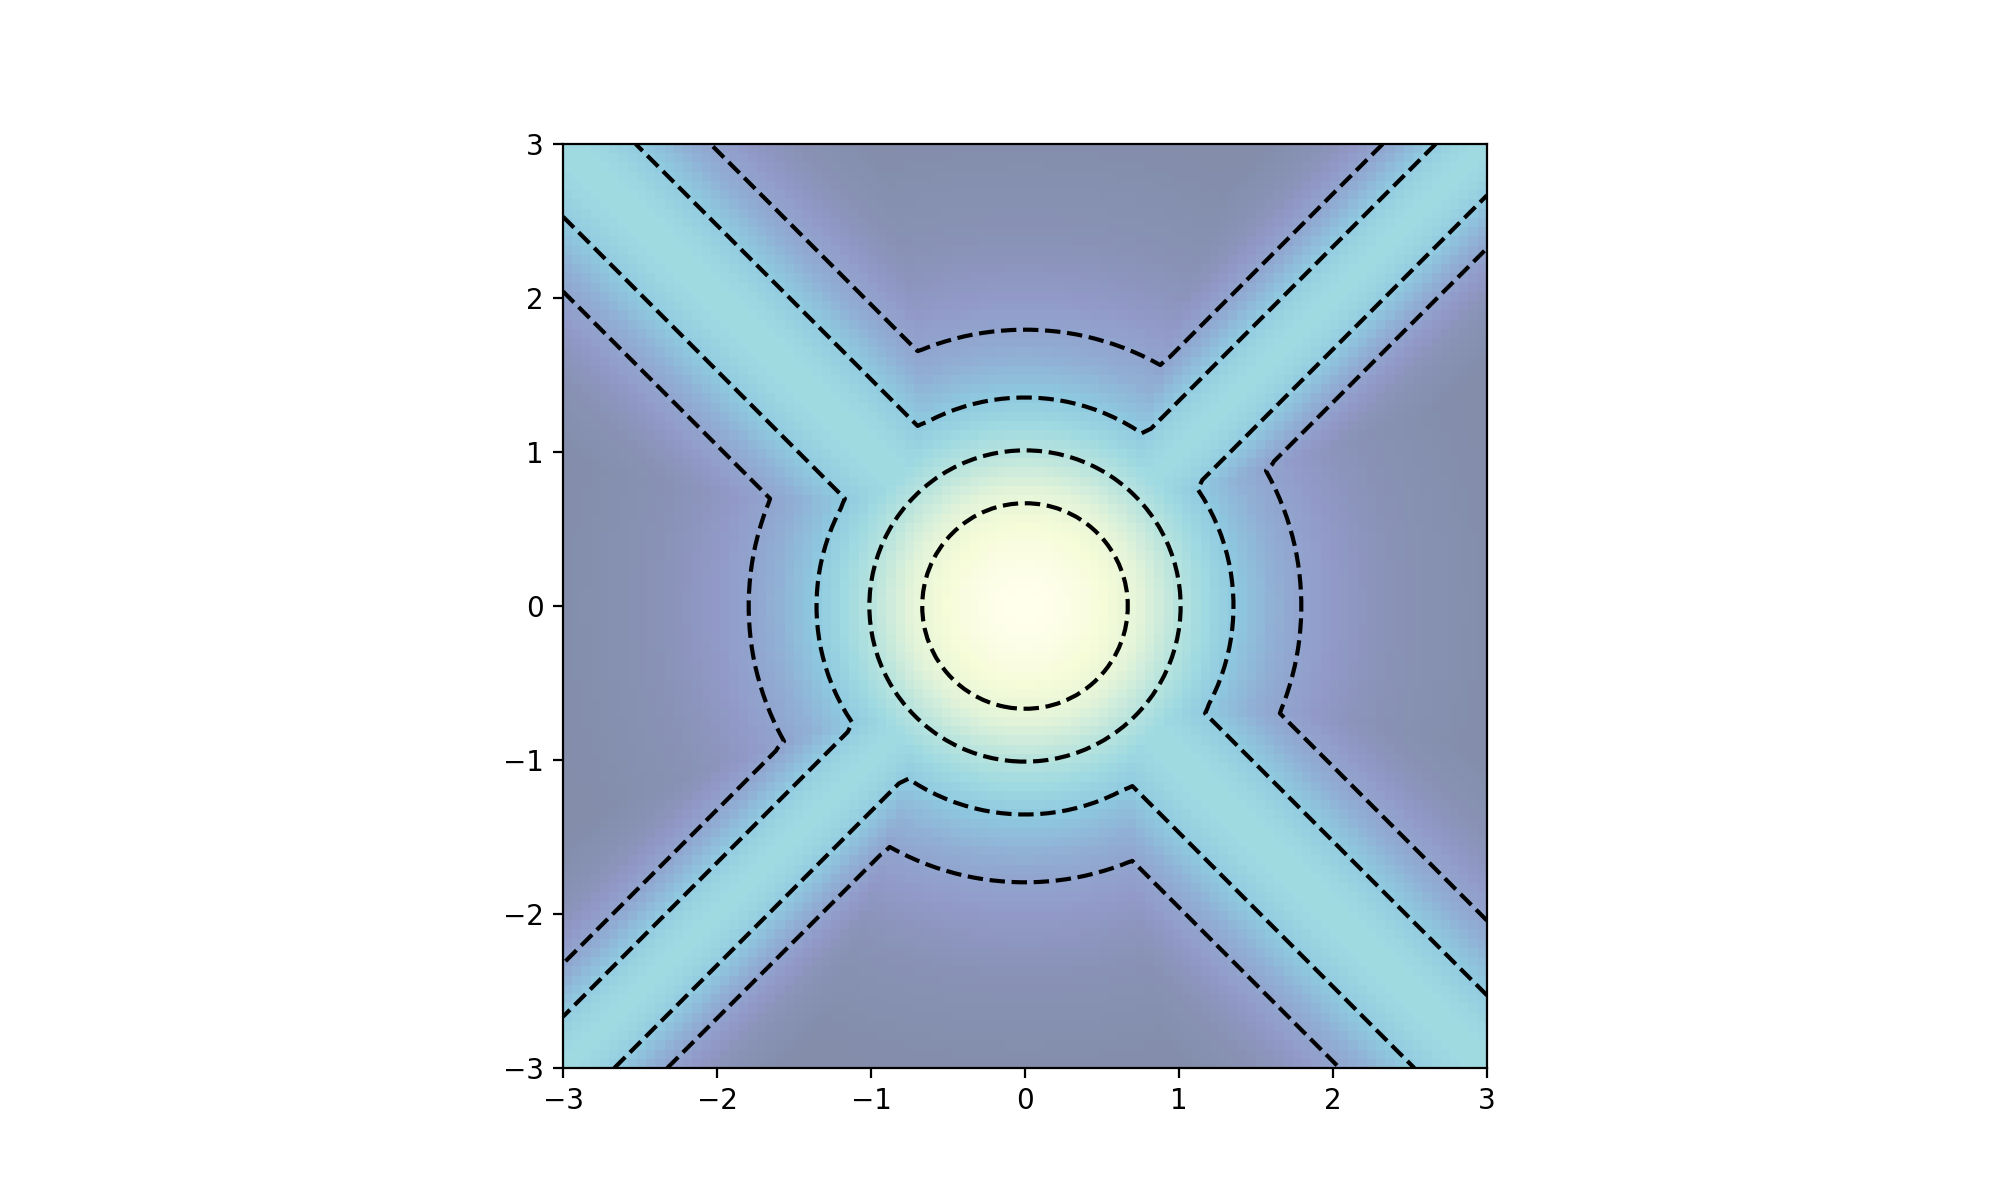

In [3]:
n_samples = 2000
n_features = 5

def regression_function(X):
    r1 = X[:, 0] - X[:, 1]
    r2 = X[:, 0] + X[:, 1]
    return (20 * np.maximum(
        np.maximum(np.exp(-2 * r1 ** 2), np.exp(-r2 ** 2)),
        2 * np.exp(-0.5 * (X[:, 0] ** 2 + X[:, 1] ** 2))))

# generate data
X = rng.uniform(-3, 3, size=n_samples * n_features).reshape(n_samples, n_features)
y = regression_function(X) + rng.randn(n_samples)

# visualize the function 
def f(x, y):
    r1 = x - y
    r2 = x + y
    return (20 * np.maximum(
        np.maximum(np.exp(-2 * r1 ** 2), np.exp(-r2 ** 2)),
        2 * np.exp(-0.5 * (x ** 2 + y ** 2))))
x_ = np.linspace(-3, 3, 100)
y_ = np.linspace(-3, 3, 100)
XX, YY = np.meshgrid(x_, y_)
Z = f(XX, YY)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(XX, YY, Z, 3, colors='black', linestyles='--', levels=5, linewidths=1.5)
ax.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='YlGnBu_r', alpha=0.5)
ax.set_aspect('equal')

# Train a Dimension Reduction Forest

In [4]:
from drforest.ensemble import DimensionReductionForestRegressor

# train forest
forest = DimensionReductionForestRegressor(
    n_estimators=500, min_samples_leaf=3, n_jobs=-1, random_state=42)

forest.fit(X, y)

# predictions
y_pred = forest.predict(X)
print("Training MSE: {:.2f}".format(mean_squared_error(y, y_pred)))
print("Out-of-bag MSE: {:.2f}".format(forest.oob_mse_))

Training MSE: 0.73
Out-of-bag MSE: 3.05


# Global Permutation-Based Variable Importance

<IPython.core.display.Javascript object>


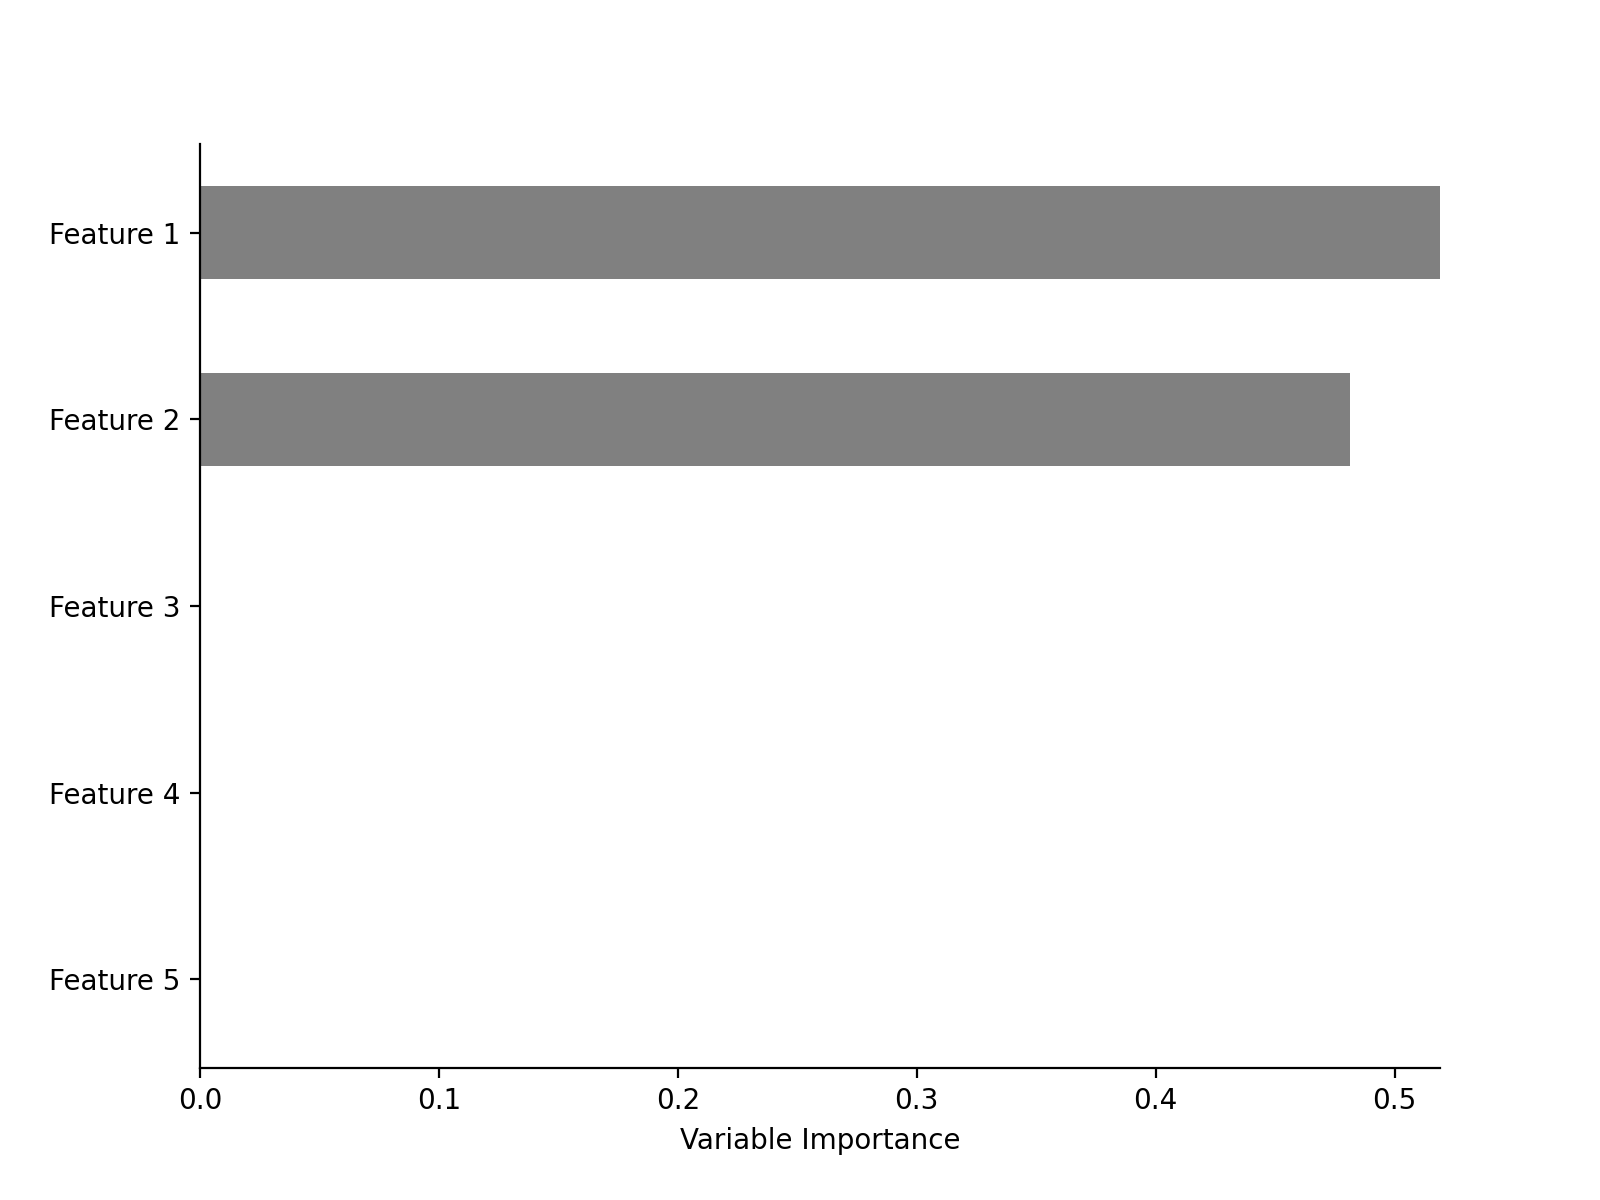

In [5]:
from drforest.plots import plot_variable_importance

plot_variable_importance(forest.feature_importances_);

# Local Principal Directions (LPDs)

<IPython.core.display.Javascript object>


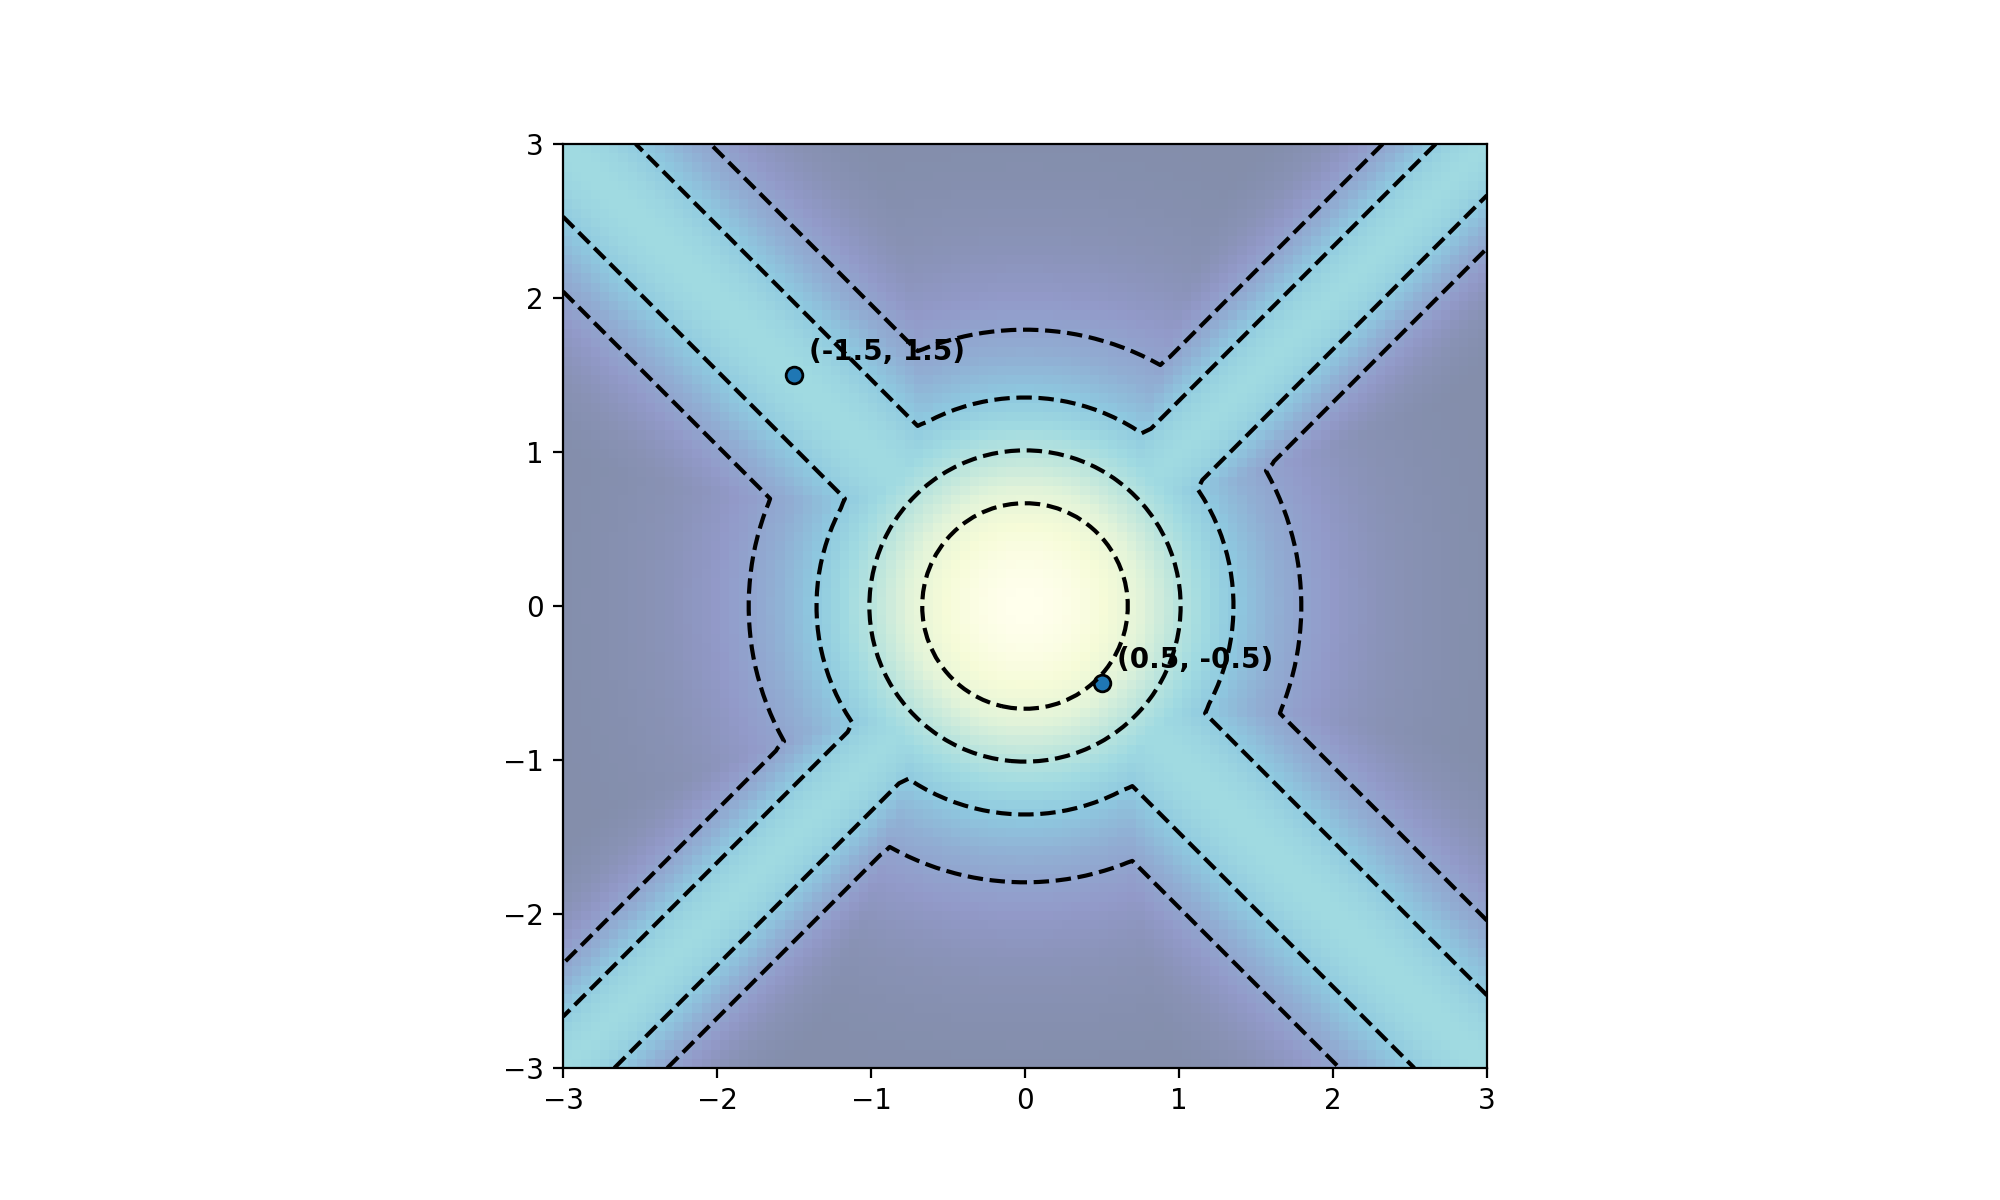

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(XX, YY, Z, 3, colors='black', linestyles='--', levels=5, linewidths=1.5)
ax.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='YlGnBu_r', alpha=0.5)
ax.scatter([-1.5, 0.5], [1.5, -0.5], color=None, edgecolor='black')
ax.annotate(r'(-1.5, 1.5)', (-1.5, 1.5), xytext=(-1.4, 1.6), fontname='Sans', weight='bold')
ax.annotate(r'(0.5, -0.5)', (0.5, -0.5), xytext=(0.6, -0.4), fontname='Sans', weight='bold')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


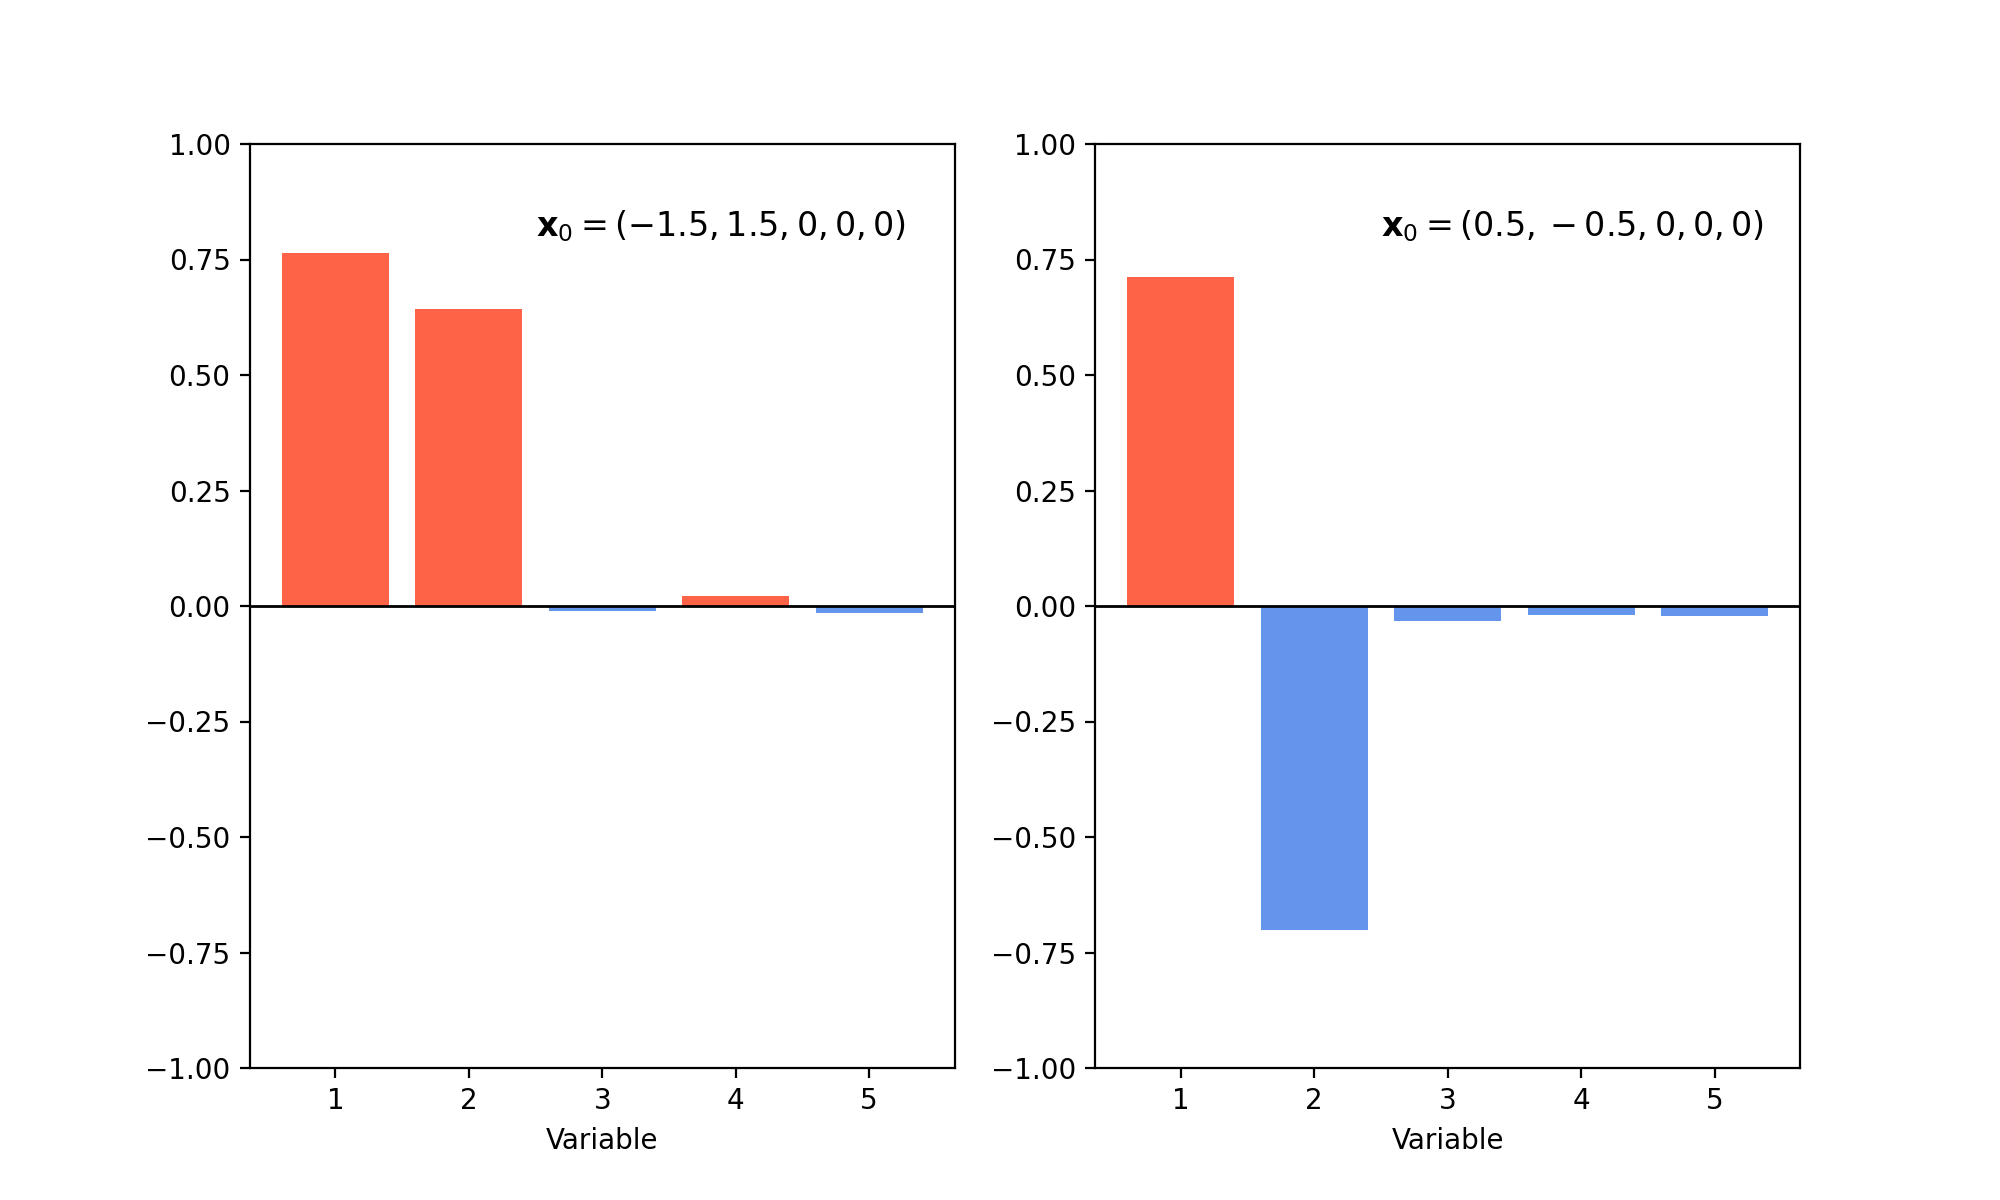

In [7]:
# LSVI at x0 = (-1.5, 1.5, 0, 0, 0)
x0 = np.zeros(n_features)
x0[:2] = np.array([-1.5, 1.5])
lpd_x0 = forest.local_principal_direction(x0)
lpd_x0 *= np.sign(lpd_x0[0])

# LSVI at x0 = (0.5, -0.5, 0, 0, 0)
x1 = np.zeros(n_features)
x1[:2] = [0.5, -0.5]
lpd_x1 = forest.local_principal_direction(x1)
lpd_x1 *= np.sign(lpd_x1[0])


fig, ax = plt.subplots(figsize=(10, 6), ncols=2)

color = ['tomato' if x > 0 else 'cornflowerblue' for x in lpd_x0]
ax[0].bar(np.arange(1, n_features + 1), lpd_x0, color=color)
ax[0].axhline(0, color='black', linestyle='-', lw=1)
ax[0].set_ylim(-1, 1)
ax[0].set_xlabel('Variable')
ax[0].text(2.5, 0.8, '$\mathbf{x}_0 = (-1.5, 1.5, 0, 0, 0)$', fontsize=12)

color = ['tomato' if x > 0 else 'cornflowerblue' for x in lpd_x1]
ax[1].bar(np.arange(1, n_features + 1), lpd_x1, color=color)
ax[1].set_xlabel('Variable')
ax[1].invert_yaxis()
ax[1].axhline(0, color='black', linestyle='-', lw=1)
ax[1].text(2.5, 0.8, '$\mathbf{x}_0 = (0.5, -0.5, 0, 0, 0)$', fontsize=12)
ax[1].set_ylim(-1, 1);